In [1]:
import networkx as nx
import numpy as np
import itertools
import math
import matplotlib.pyplot as plt

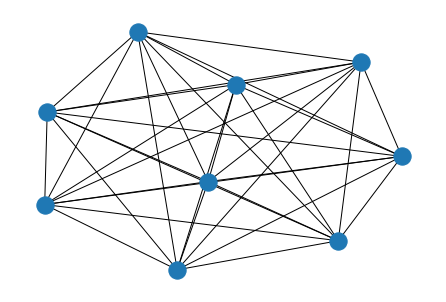

In [2]:
k_n = nx.complete_graph(9)
layout = nx.spring_layout(k_n)
nx.draw(k_n, pos=layout)

In [3]:
G = nx.Graph()
G.add_edges_from(k_n.edges, color = "black")

In [4]:
def random_infection(G, num):
    # num: number of edges that are infected at initial state
    infected_indices = set(np.random.choice(len(G.edges),num,replace=False))
    edges_editable = list(G.edges(data=True))
    for ind in range(len(edges_editable)):
        # list --> make the view object modifiable
        # ind --> ind-th edge
        # 2 --> select the 2-th position in (v_0,v_1,attributes_dict)
        #["color"] --> select the key in the dictionary of attributes
        # "red" --> modify value corresponding to the key "color"
        if ind in infected_indices:
            edges_editable[ind][2]["color"]="red"
        else:
            edges_editable[ind][2]["color"]="black"

random_infection(G,8)

(0, 1, {'color': 'black'})
(0, 2, {'color': 'red'})
(0, 3, {'color': 'black'})
(0, 4, {'color': 'red'})
(0, 5, {'color': 'black'})
(0, 6, {'color': 'black'})
(0, 7, {'color': 'black'})
(0, 8, {'color': 'red'})
(1, 2, {'color': 'black'})
(1, 3, {'color': 'black'})
(1, 4, {'color': 'red'})
(1, 5, {'color': 'black'})
(1, 6, {'color': 'black'})
(1, 7, {'color': 'black'})
(1, 8, {'color': 'black'})
(2, 3, {'color': 'red'})
(2, 4, {'color': 'black'})
(2, 5, {'color': 'black'})
(2, 6, {'color': 'black'})
(2, 7, {'color': 'black'})
(2, 8, {'color': 'red'})
(3, 4, {'color': 'black'})
(3, 5, {'color': 'black'})
(3, 6, {'color': 'red'})
(3, 7, {'color': 'black'})
(3, 8, {'color': 'black'})
(4, 5, {'color': 'black'})
(4, 6, {'color': 'black'})
(4, 7, {'color': 'red'})
(4, 8, {'color': 'black'})
(5, 6, {'color': 'black'})
(5, 7, {'color': 'black'})
(5, 8, {'color': 'black'})
(6, 7, {'color': 'black'})
(6, 8, {'color': 'black'})
(7, 8, {'color': 'black'})


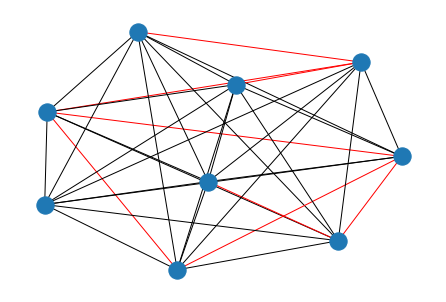

In [5]:
# display infected graph
for i in G.edges(data=True):
    print(i)
colors = nx.get_edge_attributes(G,'color').values()
nx.draw(G,edge_color=colors,pos=layout)

In [6]:
# define H, the subgraph. In this simulation, the subgraph should be K_n
subgraph = nx.complete_graph(3)

In [7]:
# Todo: the below functions maybe simplied with
# nx.enumerate_all_cliques(G)

In [8]:
def produce_all_connected_subgraphs(G, subgraph):
    # modified code from ↓
    # https://stackoverflow.com/questions/54440779/how-to-find-all-connected-subgraph-of-a-graph-in-networkx
    nb_nodes = len(subgraph.nodes)
    all_connected_subgraphs = []
    
    # combinations of nodes matching the order of the subgraph
    for SG in (G.subgraph(selected_nodes) for selected_nodes in itertools.combinations(G, nb_nodes)):
        if True:
        # if nx.is_connected(SG): ← not necessary for complete graphs
            all_connected_subgraphs.append(SG)
    return all_connected_subgraphs
all_connected_subgraphs = produce_all_connected_subgraphs(G,subgraph)

In [9]:
# for all sets of nodes then for each edge between two elements
def plot_next_complete(G,subgraph,all_connected_subgraphs,layout,time_step):
    if time_step!=0:
        black_edge = 0
        red_edge = 0
        total_edge = len(subgraph.edges)
        uninfected_edge = []
        for i in all_connected_subgraphs:
            black_edge = 0
            red_edge = 0
            target_edge = None
            for e in itertools.combinations(i, 2):
                if G[e[0]][e[1]]["color"] == "black":
                    black_edge+=1
                    target_edge = e
                else:
                    red_edge+=1
                if black_edge>=2:
                    break
            if red_edge==total_edge-1:
                uninfected_edge.append(target_edge)
        for e in uninfected_edge:
            G[e[0]][e[1]]["color"] = "red"

    colors = nx.get_edge_attributes(G,'color').values()
    nx.draw(G,edge_color=colors,pos=layout)

def fully_infected(G):
    # return whether G is fully infected, and number of its infected edge
    counts = 0
    fully_infected = True
    for edge in G.edges(data=True):
        if edge[2]["color"]=="black":
            fully_infected = False
        else:
            counts+=1
        
    return fully_infected,counts

In [10]:
def trial(num_iterations,G, subgraph, all_connected_subgraphs, layout):
    plt.figure(figsize=(20,20))
    prev_counts = 0
    for i in range(num_iterations):
        plt.subplot(num_iterations//4+1, 4, i+1)
        plot_next_complete(G,subgraph,all_connected_subgraphs,layout,i)
        plt.title(f"Time step {i}")
        infected, cur_counts = fully_infected(G)
        if infected:
            print(f"Fully infected at time step {i}")
            break
        if prev_counts==cur_counts:
            print(f"Process converged at time step {i-1}")
            break
        prev_counts = cur_counts
        

Process converged at time step 3


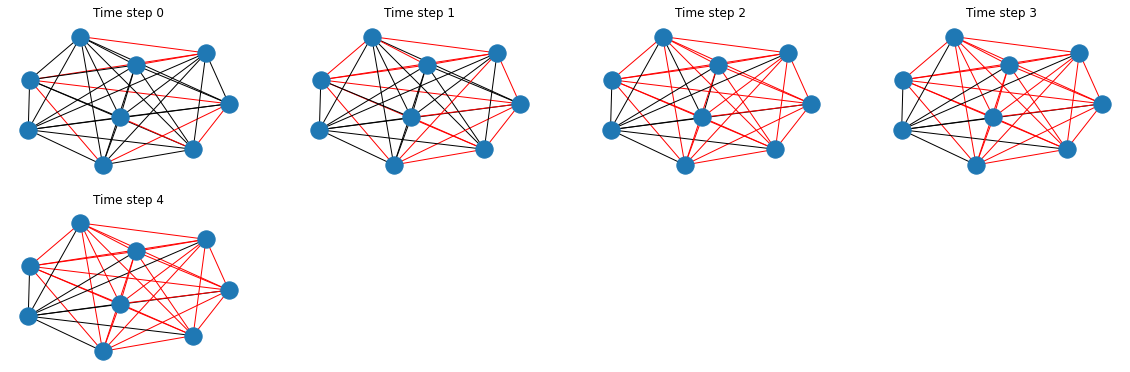

In [11]:
trial(20,G,subgraph,all_connected_subgraphs,layout)

Fully infected at time step 2


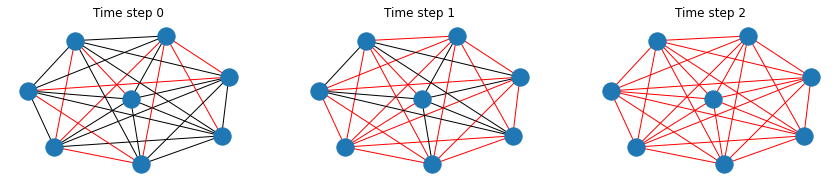

In [12]:
# usage

# 1. G must be a complete graph, K_n
G = nx.complete_graph(8)  

# 2: Define the initial state. num is the number of initially infected edge G starts with
random_infection(G, num=9)

# 3: Define H. H must be a complete graph in this simulation
H = nx.complete_graph(3)

# 3: Find all combinations of nodes where a complete subgraph can be induced. Note that this part has very bad scalability 
all_connected_subgraphs = produce_all_connected_subgraphs(G, H)

# 4: Perform the H-graph bootstrap percolation process for num_iterations iterations. A fixed layout for consistent visualization.
# The loop will halt once H percolates or the process converges
layout = nx.spring_layout(G)
trial(20, G, H, all_connected_subgraphs, layout)